# Análisis de Factores que Incrementan el Consumo de Combustible y la Huella de Carbono

In [23]:
# IMPORTAR LIBRERIAS NECESARIAS
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML
import seaborn as sns

# DECLARACIÓN DE VARIABLES 
# TAMAÑO DE FUENTE DEL TITULO DE LA GRAFÍCA
size_title = 15 
# TAMAÑO DE FUENTE DEL EJE X, EJE Y DE LA GRAFÍCA
size_subtitle = 12
# TAMAÑO DE FUENTE DEL TEXTO DENTRO DEL GRÁFICO 
size_graph_text = 12

## 1 Lectura y limpieza de los datos

### 1.1. Resumen de cambios y variables resultantes

In [3]:
# Proyecto de medio curso para Samsung Innovation Campus: Huella de carbono

# Lectura de datos y limpieza
# Autor: Dwight Sutherland
# Fecha: 3/18/2024


#______________________________________Resumen de los cambios y variables resultantes_______________________________________
'''
Este codigo se encarga de limpiar los datos originales y de crear un nuevo dataframe con los datos de 1990 en adelante.
Ademas, se crea un dataframe con los paises que nos interesan y se separan en dos grupos: paises industrializados 
y paises emergentes.

Para cada uno de los dataframes se crea un archivo csv para su visualizacion rapida y se crea un codebook con las 
definiciones de las categorias restantes.

Los archivos creados por este código son:

    - owid-co2-data-1990.csv: dataframe con los datos de 1990 en adelante
    - owid-co2-data-1990-country.csv: dataframe con los paises que nos interesan
    - industrializados.csv: dataframe con los paises industrializados
    - emergentes.csv: dataframe con los paises emergentes
    - owid-co2-codebook-new.csv: codebook con las categorias restantes
'''


# Las variables resultantes son:
#   data_og: dataframe con los datos originales
#   data: dataframe con los datos de 1990 en adelante
#   data_ind: dataframe con los paises industrializados
#   data_em: dataframe con los paises emergentes
#   codebook_og: codebook original
#   codebook: codebook con las categorias restantes


# Las categorias que se eliminaron porque incluían datos vacios son:
'''
{'cumulative_other_co2', 'share_of_temperature_change_from_ghg', 'temperature_change_from_n2o', 'trade_co2_share', 
'energy_per_gdp', 'consumption_co2_per_capita', 'methane', 'temperature_change_from_ch4', 'consumption_co2', 
'ghg_excluding_lucf_per_capita', 'co2_including_luc_per_gdp', 'co2_per_gdp', 'trade_co2', 'gdp', 'nitrous_oxide', 
'temperature_change_from_ghg', 'temperature_change_from_co2', 'share_global_other_co2', 'consumption_co2_per_gdp', 
'methane_per_capita', 'share_global_cumulative_other_co2', 'total_ghg_excluding_lucf', 'ghg_per_capita', 
'nitrous_oxide_per_capita', 'total_ghg', 'other_industry_co2', 'other_co2_per_capita'}
'''

# Las categorias que permanecen son:
'''
{'co2_including_luc', 'cumulative_coal_co2', 'flaring_co2', 'oil_co2', 'coal_co2', 'coal_co2_per_capita', 
'land_use_change_co2', 'year', 'share_global_cement_co2', 'share_global_cumulative_coal_co2', 'energy_per_capita', 
'share_global_cumulative_cement_co2', 'share_global_gas_co2', 'cumulative_flaring_co2', 'oil_co2_per_capita', 
'co2_per_unit_energy', 'share_global_flaring_co2', 'iso_code', 'co2_including_luc_growth_prct', 'co2', 
'cumulative_cement_co2', 'population', 'share_global_cumulative_co2_including_luc', 'gas_co2_per_capita', 
'share_global_cumulative_co2', 'co2_per_capita', 'share_global_cumulative_flaring_co2', 'share_global_coal_co2', 
'share_global_co2_including_luc', 'cement_co2_per_capita', 'cumulative_co2_including_luc', 'cumulative_gas_co2', 
'co2_including_luc_per_unit_energy', 'share_global_luc_co2', 'share_global_oil_co2', 'share_global_co2', 'gas_co2', 
'primary_energy_consumption', 'cement_co2', 'co2_growth_abs', 'country', 'share_global_cumulative_oil_co2', 
'share_global_cumulative_gas_co2', 'flaring_co2_per_capita', 'co2_including_luc_per_capita', 
'co2_including_luc_growth_abs', 'cumulative_oil_co2', 'land_use_change_co2_per_capita', 
'share_global_cumulative_luc_co2', 'cumulative_luc_co2', 'co2_growth_prct', 'cumulative_co2'}
'''

"\n{'co2_including_luc', 'cumulative_coal_co2', 'flaring_co2', 'oil_co2', 'coal_co2', 'coal_co2_per_capita', \n'land_use_change_co2', 'year', 'share_global_cement_co2', 'share_global_cumulative_coal_co2', 'energy_per_capita', \n'share_global_cumulative_cement_co2', 'share_global_gas_co2', 'cumulative_flaring_co2', 'oil_co2_per_capita', \n'co2_per_unit_energy', 'share_global_flaring_co2', 'iso_code', 'co2_including_luc_growth_prct', 'co2', \n'cumulative_cement_co2', 'population', 'share_global_cumulative_co2_including_luc', 'gas_co2_per_capita', \n'share_global_cumulative_co2', 'co2_per_capita', 'share_global_cumulative_flaring_co2', 'share_global_coal_co2', \n'share_global_co2_including_luc', 'cement_co2_per_capita', 'cumulative_co2_including_luc', 'cumulative_gas_co2', \n'co2_including_luc_per_unit_energy', 'share_global_luc_co2', 'share_global_oil_co2', 'share_global_co2', 'gas_co2', \n'primary_energy_consumption', 'cement_co2', 'co2_growth_abs', 'country', 'share_global_cumulative_o

### 1.2. Lectura de datos

In [4]:
#___________________________________________Lectura de los datos_______________________________________

### Leemos el archivo de datos

ruta_derivada = 'derivados'      # Ruta completa
data_og = 'owid-co2-data.csv'
print(data_og)
data_og = pd.read_csv(data_og)      # Dataframe con los datos originales

owid-co2-data.csv


### 1.3. Dataframe con los datos de 1990 en adelante

In [5]:

#___________________________________________Dataframe con los datos de 1990 en adelante_______________________________________
### Eliminamos las filas correspondientes a 1989 para atrás y guardamos en otro archivo nuevo

data = data_og[data_og['year'] > 1989]      # Dataframe con los datos de 1990 en adelante
data.to_csv(ruta_derivada + '\data-1990.csv', index=False)

### 1.4. Dataframe con los paises que nos interesan y eliminamos las categorias con valores nulos

In [6]:

#___________________________________________Dataframe con los paises que nos interesan_______________________________________
'''
Creamos un nuevo dataframe con los paises que nos interesan
United States, Canada, Japan, Germany, United Kingdom, China, India, Mexico, South Korea
'''

data = data[(data['country'] == 'United States') | (data['country'] == 'Canada') | (data['country'] == 'Japan')|
            (data['country'] == 'Germany') | (data['country'] == 'United Kingdom') | (data['country'] == 'China')|
            (data['country'] == 'India') | (data['country'] == 'Mexico') | (data['country'] == 'South Korea')| (data['country'] == 'Brazil')]


### Eliminamos las categorias con valores nulos
# Las categorias co2, methane, methane_per_capita, nitrous_oxide, nitrous_oxide_per_capita deben mantenerse
# aunque tengan valores vacios

data_columns = data.columns
data = data.dropna(how='any', axis=1)       # Eliminamos las categorias con valores nulos
data_columns_new = data.columns
data.to_csv(ruta_derivada + '\data-1990-country_of_interest.csv', index=False)


"print(f'Las categorias eliminadas son: {set(data_columns) - set(data_columns_new)}\n')\nprint(f'Las categorias que permanecen son: {set(data_columns_new)}\n')"

### 1.5. Dataframe con los paises industrializados y emergentes

In [7]:

# ___________________________________________Dataframe con los paises industrializados y emergentes_______________________________________

'''
Separo los datos en dos grupos:
    - Paises industrializados: United States, Canada, Japan, Germany, United Kingdom
    - Paises emergentes: China, India, Mexico, South Korea, Brazil
'''

### Dataframe con los paises industrializados
data_ind = data[(data['country'] == 'United States') | (data['country'] == 'Canada') | (data['country'] == 'Japan')
                | (data['country'] == 'Germany') | (data['country'] == 'United Kingdom')]

### Dataframe con los paises emergentes
data_em = data[(data['country'] == 'China') | (data['country'] == 'India') | (data['country'] == 'Mexico')
                | (data['country'] == 'South Korea') | (data['country'] == 'Brazil')]

data_ind.to_csv(ruta_derivada + '\industrializados.csv', index=False)
data_em.to_csv(ruta_derivada + '\emergentes.csv', index=False)

### 1.6. Codebook con las categorias restantes del dataframe

In [8]:

#___________________________________________Codebook con las categorias restantes_______________________________________

### Modificacion del codebook para que permanezcan solo las categorias restantes
codebook_og = pd.read_csv('owid-co2-codebook.csv')     
codebook = codebook_og[codebook_og['column'].isin(data_columns_new)]      
codebook.to_csv(ruta_derivada + '\codebook-new.csv', index=False)

# print(f'El nuevo codebook tiene {len(codebook)} categorias\nEL codebook original tiene {len(data_columns)} categorias\n')

### 2.4 Análisis del país que mas emisiones CO2 produce y país que menos emisiones CO2 produce

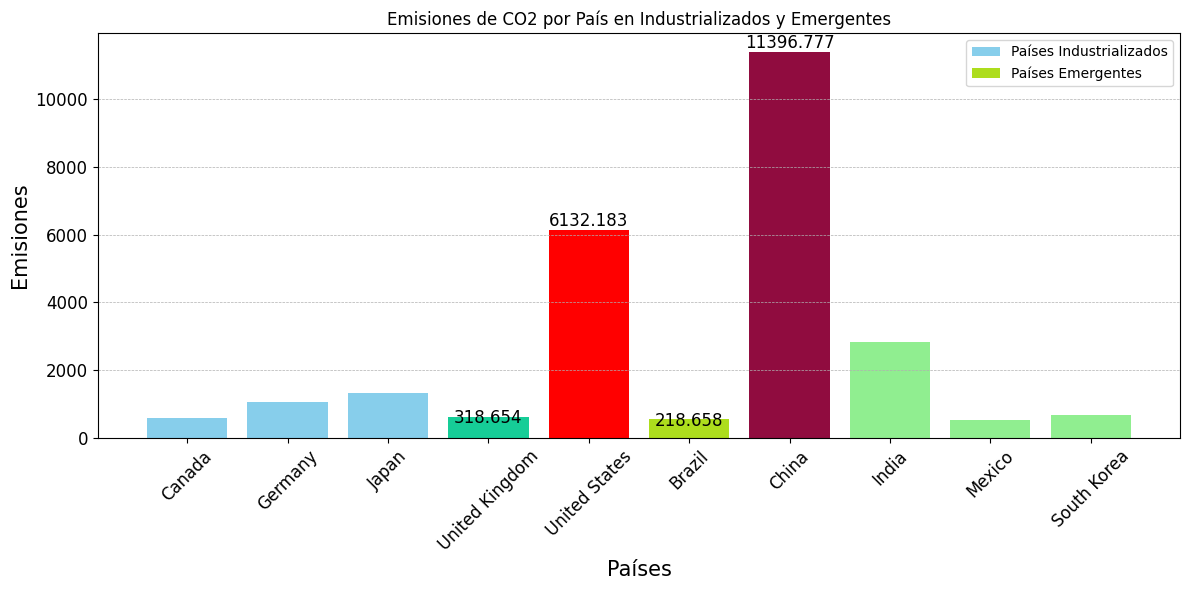

In [9]:
pais_max_emisiones_ind = data_ind.loc[data_ind['co2'].idxmax()]
pais_min_emisiones_ind = data_ind.loc[data_ind['co2'].idxmin()]

pais_max_emisiones_em = data_em.loc[data_em['co2'].idxmax()]
pais_min_emisiones_em = data_em.loc[data_em['co2'].idxmin()]

# Asignar colores a las barras según las emisiones de cada país
colors_df1 = ['red' if country == pais_max_emisiones_ind['country'] else '#16CD97' if country == pais_min_emisiones_ind['country'] else 'skyblue' for country in data_ind['country']]
colors_df2 = ['#900C3F' if country == pais_max_emisiones_em['country'] else '#ADDD1D' if country == pais_min_emisiones_em['country'] else 'lightgreen' for country in data_em['country']]

# Crear un gráfico de barras para ambos DataFrames
plt.figure(figsize=(12, 6))

plt.bar(data_ind['country'], data_ind['co2'], color=colors_df1, label='Países Industrializados')
plt.bar(data_em['country'], data_em['co2'], color=colors_df2, label='Países Emergentes')

plt.xlabel('Países',fontsize=size_title)
plt.ylabel('Emisiones',fontsize=size_title)
plt.title('Emisiones de CO2 por País en Industrializados y Emergentes')
plt.legend()

plt.text(pais_max_emisiones_ind['country'], pais_max_emisiones_ind['co2'], str(pais_max_emisiones_ind['co2']), ha='center', va='bottom', color='black', fontsize=size_graph_text)
plt.text(pais_min_emisiones_ind['country'], pais_min_emisiones_ind['co2'], str(pais_min_emisiones_ind['co2']), ha='center', va='bottom', color='black', fontsize=size_graph_text)
plt.text(pais_max_emisiones_em['country'], pais_max_emisiones_em['co2'], str(pais_max_emisiones_em['co2']), ha='center', va='bottom', color='black', fontsize=size_graph_text)
plt.text(pais_min_emisiones_em['country'], pais_min_emisiones_em['co2'], str(pais_min_emisiones_em['co2']), ha='center', va='bottom', color='black', fontsize=size_graph_text)

plt.xticks(rotation=45,fontsize = size_subtitle)
plt.yticks(fontsize = size_subtitle)
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

### 2.3 Emisiones de Co2 por combustible o sector de los países emergentes

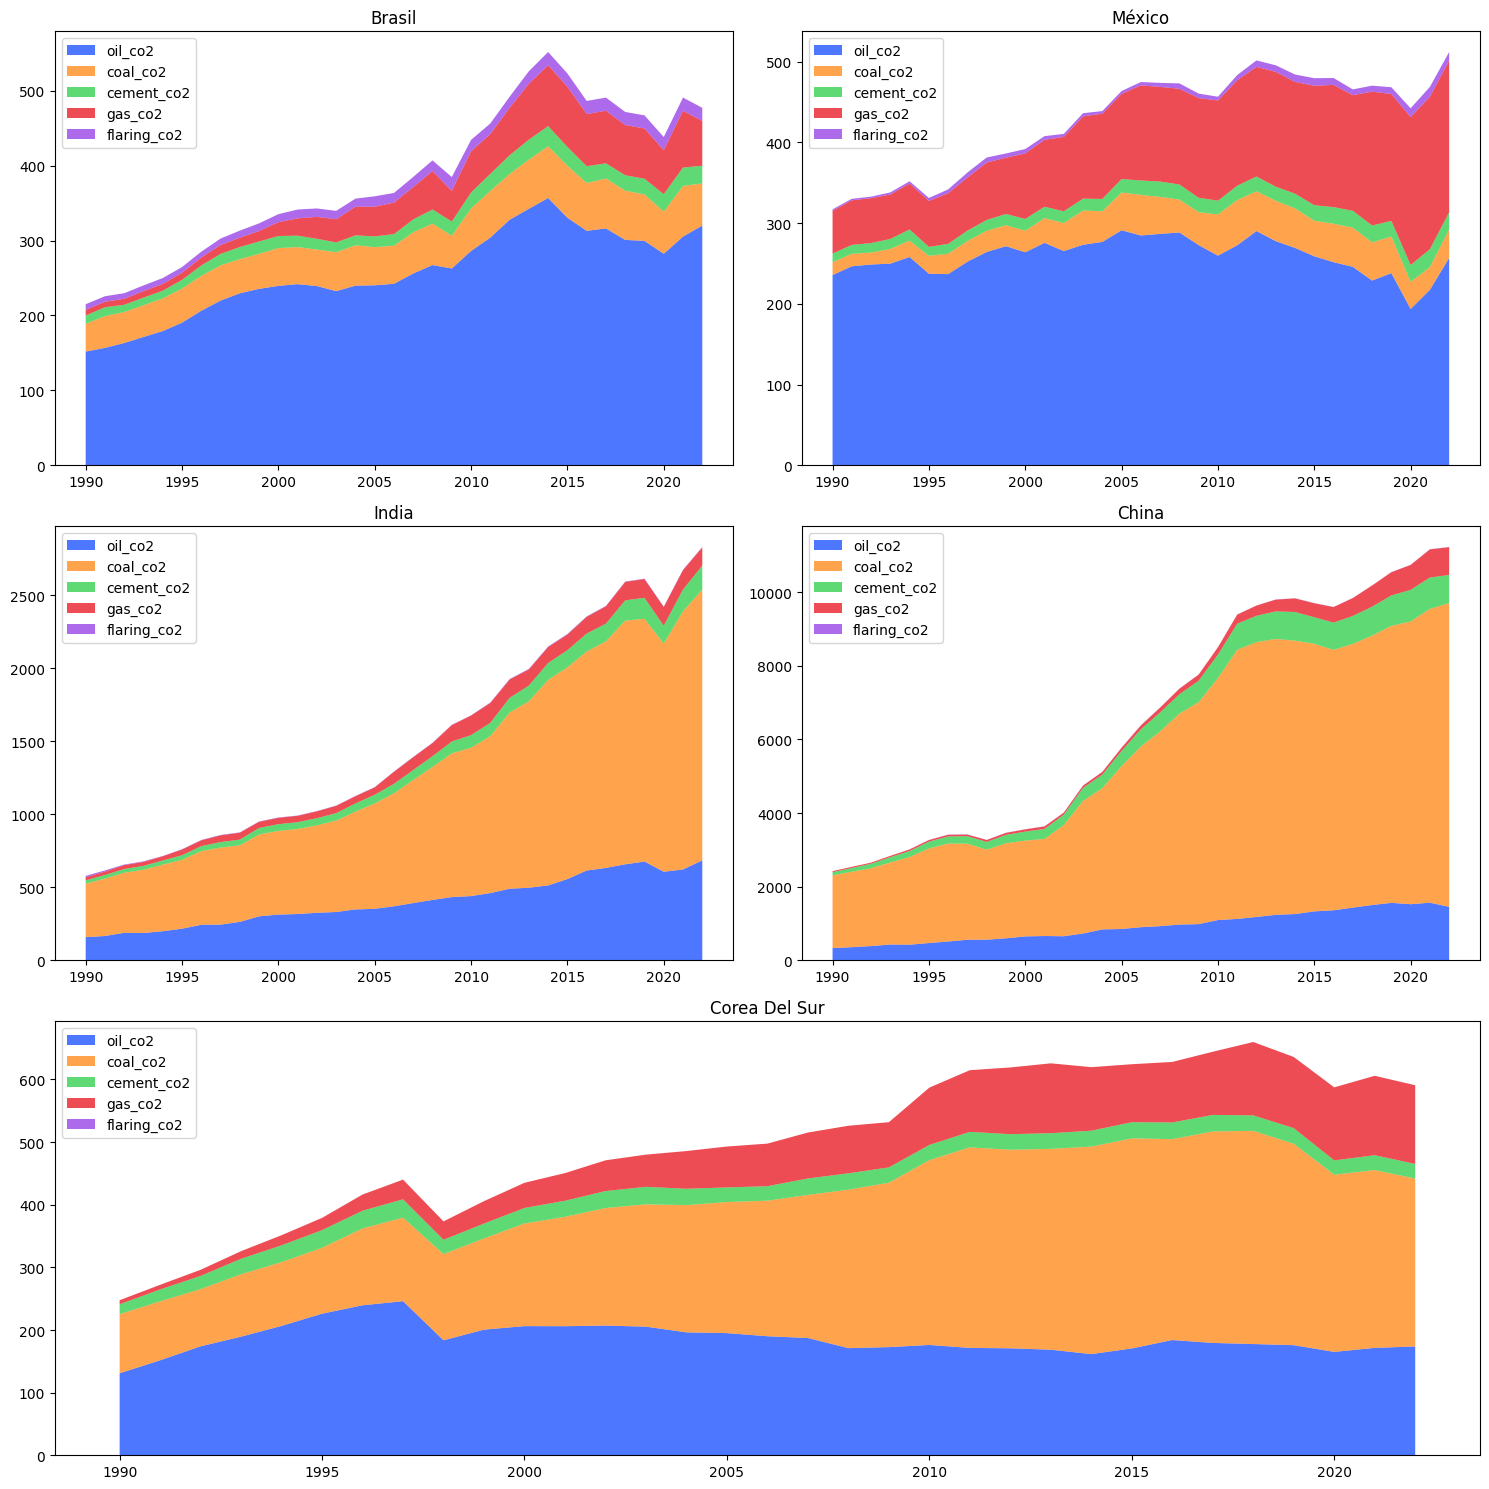

In [34]:
# Filtrar las columnas de emisiones para los países emergentes
emisiones_brasil = data_em[data_em['country'] == 'Brazil'][['oil_co2', 'coal_co2', 'cement_co2', 'gas_co2', 'flaring_co2']]
emisiones_mexico = data_em[data_em['country'] == 'Mexico'][['oil_co2', 'coal_co2', 'cement_co2', 'gas_co2', 'flaring_co2']]
emisiones_india = data_em[data_em['country'] == 'India'][['oil_co2', 'coal_co2', 'cement_co2', 'gas_co2', 'flaring_co2']]
emisiones_china = data_em[data_em['country'] == 'China'][['oil_co2', 'coal_co2', 'cement_co2', 'gas_co2', 'flaring_co2']]
emisiones_cdelsur = data_em[data_em['country'] == 'South Korea'][['oil_co2', 'coal_co2', 'cement_co2', 'gas_co2', 'flaring_co2']]

# Filtrar los años para los países emergentes
years_brasil = data_em[data_em['country'] == 'Brazil'][['year']]
years_mexico = data_em[data_em['country'] == 'Mexico'][['year']]
years_india = data_em[data_em['country'] == 'India'][['year']]
years_china = data_em[data_em['country'] == 'China'][['year']]
years_cdelsur = data_em[data_em['country'] == 'South Korea'][['year']]

pal = sns.color_palette('bright')

fig = plt.figure(figsize=(15, 15))

# Definir la cuadrícula de subgráficos
ax1 = plt.subplot2grid((3, 2), (0, 0))
ax2 = plt.subplot2grid((3, 2), (0, 1))
ax3 = plt.subplot2grid((3, 2), (1, 0))
ax4 = plt.subplot2grid((3, 2), (1, 1))
ax5 = plt.subplot2grid((3, 2), (2, 0), colspan=3)  # Corea del Sur ocupará los dos cuadrantes inferiores

# Graficar los stackplots para cada país y añadir leyendas
ax1.stackplot(years_brasil['year'], emisiones_brasil.T, labels=emisiones_brasil.columns, alpha=0.7, colors=pal)
ax1.set_title('Brasil')
ax1.legend(loc='upper left')

ax2.stackplot(years_mexico['year'], emisiones_mexico.T, labels=emisiones_mexico.columns, alpha=0.7, colors=pal)
ax2.set_title('México')
ax2.legend(loc='upper left')

ax3.stackplot(years_india['year'], emisiones_india.T, labels=emisiones_india.columns, alpha=0.7, colors=pal)
ax3.set_title('India')
ax3.legend(loc='upper left')

ax4.stackplot(years_china['year'], emisiones_china.T, labels=emisiones_china.columns, alpha=0.7, colors=pal)
ax4.set_title('China')
ax4.legend(loc='upper left')

ax5.stackplot(years_cdelsur['year'], emisiones_cdelsur.T, labels=emisiones_cdelsur.columns, alpha=0.7, colors=pal)
ax5.set_title('Corea Del Sur')
ax5.legend(loc='upper left')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()


### 2.3 Emisiones de Co2 por combustible o sector de los países industrializados

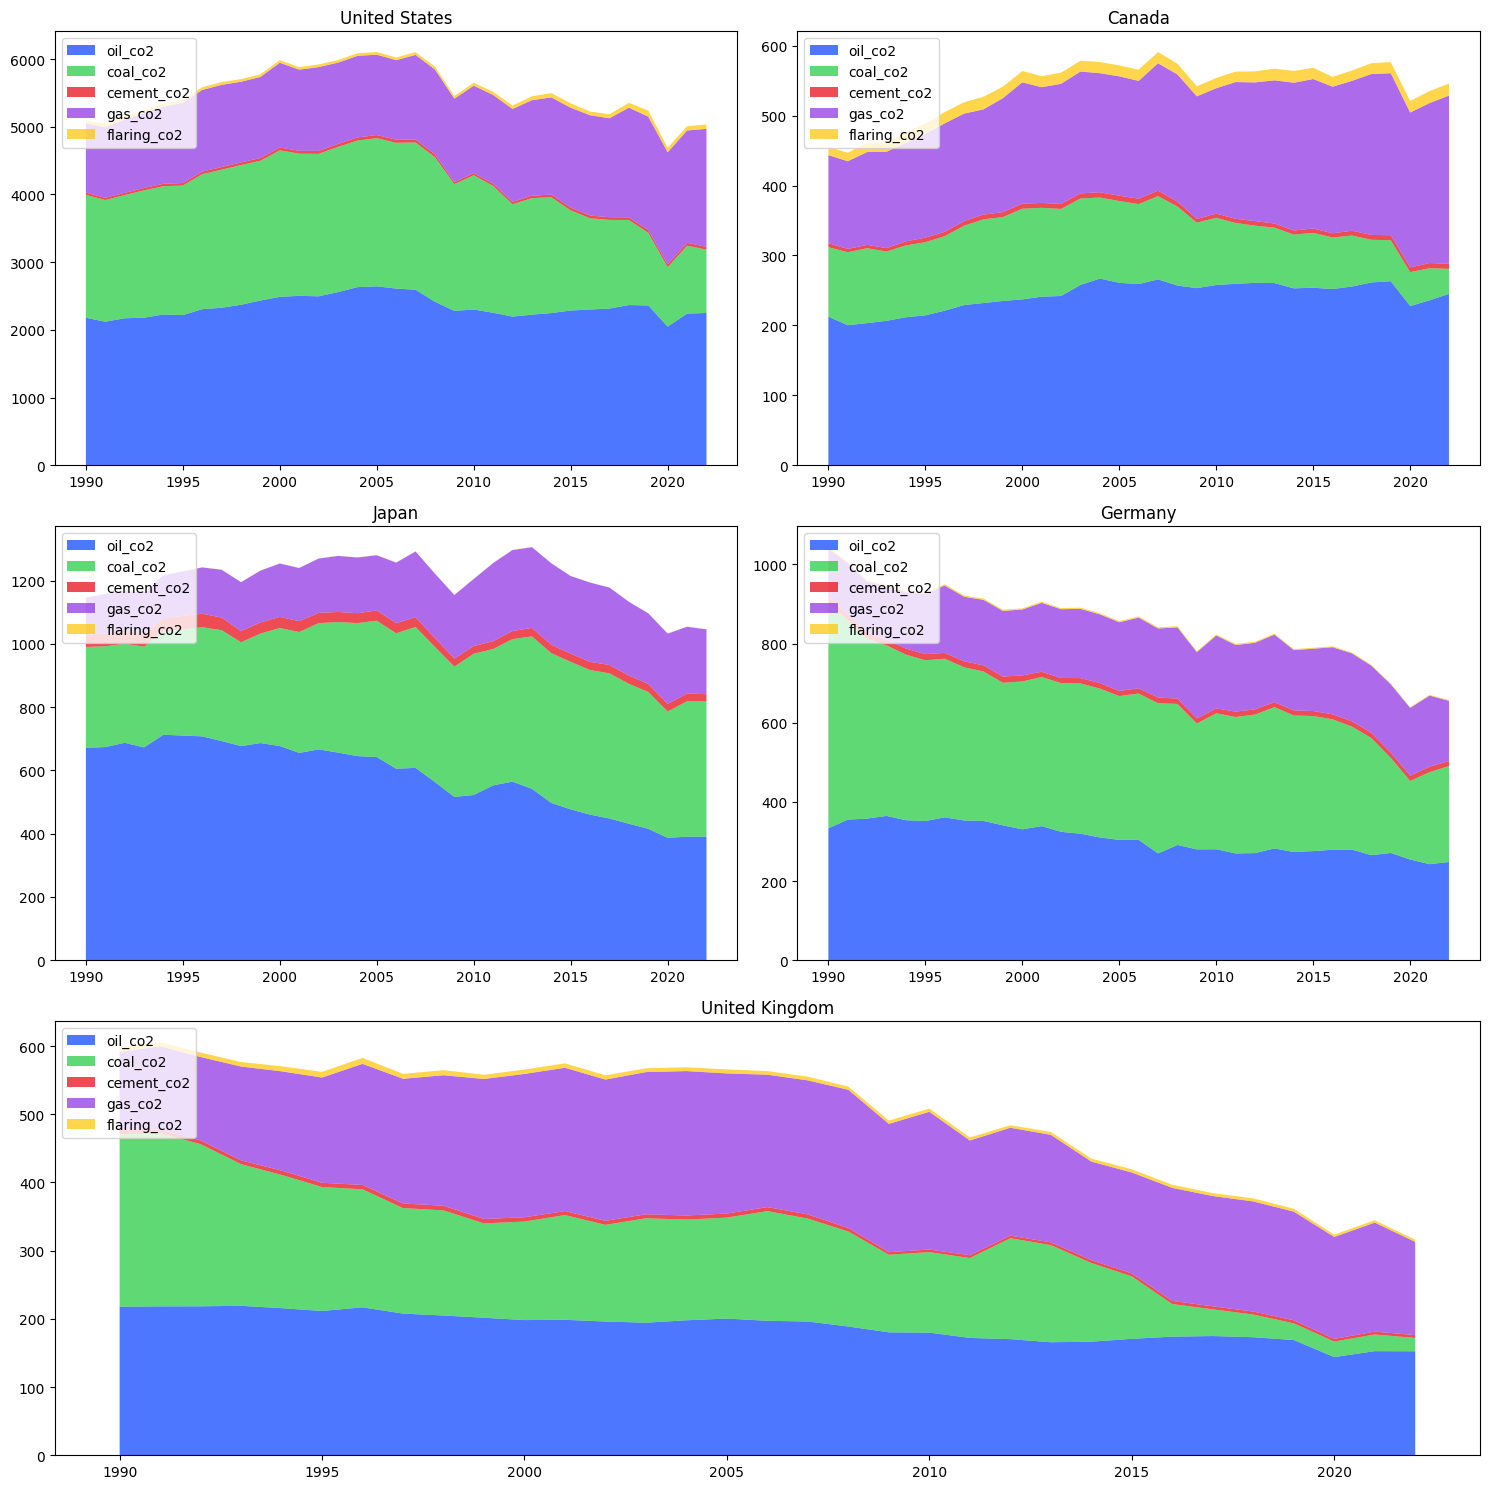

In [11]:
# Filtrar las columnas de emisiones para los países emergentes
emisiones_usa = data_ind[data_ind['country'] == 'United States'][['oil_co2', 'coal_co2', 'cement_co2', 'gas_co2', 'flaring_co2']]
emisiones_canada = data_ind[data_ind['country'] == 'Canada'][['oil_co2', 'coal_co2', 'cement_co2', 'gas_co2', 'flaring_co2']]
emisiones_japan = data_ind[data_ind['country'] == 'Japan'][['oil_co2', 'coal_co2', 'cement_co2', 'gas_co2', 'flaring_co2']]
emisiones_germany = data_ind[data_ind['country'] == 'Germany'][['oil_co2', 'coal_co2', 'cement_co2', 'gas_co2', 'flaring_co2']]
emisiones_uk = data_ind[data_ind['country'] == 'United Kingdom'][['oil_co2', 'coal_co2', 'cement_co2', 'gas_co2', 'flaring_co2']]


# Filtrar los años para los países emergentes
years_usa = data_ind[data_ind['country'] == 'United States'][['year']]
years_canada = data_ind[data_ind['country'] == 'Canada'][['year']]
years_japan = data_ind[data_ind['country'] == 'Japan'][['year']]
years_germany = data_ind[data_ind['country'] == 'Germany'][['year']]
years_uk = data_ind[data_ind['country'] == 'United Kingdom'][['year']]

pal = sns.color_palette('bright6')

fig = plt.figure(figsize=(15, 15))

# Definir la cuadrícula de subgráficos
ax1 = plt.subplot2grid((3, 2), (0, 0))
ax2 = plt.subplot2grid((3, 2), (0, 1))
ax3 = plt.subplot2grid((3, 2), (1, 0))
ax4 = plt.subplot2grid((3, 2), (1, 1))
ax5 = plt.subplot2grid((3, 2), (2, 0), colspan=3)  # United Kingdom ocupará los dos cuadrantes inferiores

# Graficar los stackplots para cada país y añadir leyendas
ax1.stackplot(years_usa['year'], emisiones_usa.T, labels=emisiones_usa.columns, alpha=0.7, colors=pal)
ax1.set_title('United States')
ax1.legend(loc='upper left')

ax2.stackplot(years_canada['year'], emisiones_canada.T, labels=emisiones_canada.columns, alpha=0.7, colors=pal)
ax2.set_title('Canada')
ax2.legend(loc='upper left')

ax3.stackplot(years_japan['year'], emisiones_japan.T, labels=emisiones_japan.columns, alpha=0.7, colors=pal)
ax3.set_title('Japan')
ax3.legend(loc='upper left')

ax4.stackplot(years_germany['year'], emisiones_germany.T, labels=emisiones_germany.columns, alpha=0.7, colors=pal)
ax4.set_title('Germany')
ax4.legend(loc='upper left')

ax5.stackplot(years_uk['year'], emisiones_uk.T, labels=emisiones_uk.columns, alpha=0.7, colors=pal)
ax5.set_title('United Kingdom')
ax5.legend(loc='upper left')

plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.show()

### 2.6 Estadística descriptiva

In [38]:
# Calcula el resumen estadístico con describe() para las columnas específicas
summary_stats_em = data_em.groupby('country')[['co2']].describe()

# Muestra el resumen estadístico en formato HTML utilizando display()
display(HTML(summary_stats_em.to_html()))

In [39]:
# Calcula el resumen estadístico con describe() para las columnas específicas
summary_stats_ind = data_ind.groupby('country')[['co2']].describe()

# Muestra el resumen estadístico en formato HTML utilizando display()
display(HTML(summary_stats_ind.to_html()))